<center>

# Web Intelligence

## Who will win the Tennis Australian Open 2020?

### Riccardo Spolaor (864877)

</center>

## Index

1. [Scaricare il dataset e rendere i dati facilmente accessibili](#s_1)
1. Section 2

<a id="s_1"></a>

## Scaricare il dataset e rendere i dati facilmente accessibili

Il primo step consiste nello scaricare i vari dataset, importarli in oggetti DataFrame della libreria pandas ed unirli in un solo DataFrame.

Tengo traccia dei differenti dataset scaricati assegnando ad ognuno una feature ***csvID***.

Ignoro i dati dell'anno 2000 in quanto sono privi di dati riguardo alle scommesse.

In [192]:
import urllib.request, zipfile, pandas

def get_file(url):
    filehandle, _ = urllib.request.urlretrieve(url)
    zip_file_obj = zipfile.ZipFile(filehandle, 'r')
    file = zip_file_obj.open(zip_file_obj.namelist()[0])
    return file

dataframe = pandas.DataFrame()
dataframe.insert(0, column ='csvID', value = 0)

for date in range(2001,2019+1):
    file = get_file('http://tennis-data.co.uk/' + str(date) + '/' + str(date) + '.zip')
    dataframe = dataframe.append(pandas.read_excel(file).assign(csvID = date-2001), sort = False, ignore_index = True)


dataframe.head()

,csvID,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
dataframe.columns

Index(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court',
       'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW',
       'SBL', 'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL',
       'WPts', 'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW',
       'MaxL', 'AvgW', 'AvgL'],
      dtype='object')

<br><br>
### Correzione dei tipi assegnati in modo scorretto
Controllo se alcune feature hanno assegnati tipi differenti da quelli attesi e correggo eventuali valori errati

In [194]:
print('Feature di tipo Object:\n', dataframe.dtypes[dataframe.dtypes == object].index.tolist())

dataframe.head()[dataframe.dtypes[dataframe.dtypes == object].index]

Feature di tipo Object:
 ['Location', 'Tournament', 'Series', 'Court', 'Surface', 'Round', 'Winner', 'Loser', 'LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'Comment', 'EXW']


,Location,Tournament,Series,Court,Surface,Round,Winner,Loser,LRank,W2,L2,W3,L3,Lsets,Comment,EXW
0,Adelaide,AAPT Championships,International,Outdoor,Hard,1st Round,Clement A.,Gaudenzi A.,101,6,0,6,3,1,Completed,NaN
1,Adelaide,AAPT Championships,International,Outdoor,Hard,1st Round,Goldstein P.,Jones A.,442,6,2,NaN,NaN,0,Completed,NaN
2,Adelaide,AAPT Championships,International,Outdoor,Hard,1st Round,Haas T.,Smith L.,485,6,3,NaN,NaN,0,Completed,NaN
3,Adelaide,AAPT Championships,International,Outdoor,Hard,1st Round,Henman T.,Rusedski G.,69,7,6,NaN,NaN,0,Completed,NaN
4,Adelaide,AAPT Championships,International,Outdoor,Hard,1st Round,Hewitt L.,Arthurs W.,83,6,3,NaN,NaN,0,Completed,NaN


***LRank***, ***W2***, ***L2***, ***W3***, ***L3***, ***Lsets*** e ***EXW*** presentano valori numerici, ma sono categorizzati come *Object*.

Controllo quali sono i valori non numerici che non permettono il corretto casting dei tipi e procedo alla loro correzione

In [195]:
import numbers
import numpy as np

def checkValues(attribute_names):
    for a in attribute_names:
        print('"'+a+'": ', 'Wrong Values -> ' , set([x for x in dataframe[a] if not isinstance(x, numbers.Number)]))
    
checkValues(['LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'EXW'])

"LRank":  Wrong Values ->  {'NR'}
"W2":  Wrong Values ->  {' '}
"L2":  Wrong Values ->  {' '}
"W3":  Wrong Values ->  {' '}
"L3":  Wrong Values ->  {' '}
"Lsets":  Wrong Values ->  {'`1'}
"EXW":  Wrong Values ->  {'2.,3'}


In [196]:
import re

def reassignNans(attribute_names):
    for a in attribute_names:
        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
        dataframe.loc[dataframe[a].isin(wrong_values), a] = np.nan
        dataframe[a] = dataframe[a].astype(float)

def correctTypos(attribute_names):
    for a in attribute_names:
        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
        indexes = dataframe[dataframe[a].isin(wrong_values)].index.values
        dataframe.iloc[indexes]
        for i in indexes:
            dataframe.iloc[i,dataframe.columns.get_loc(a)] = float(re.sub("[^0-9^.]", "", str(dataframe.iloc[i][a])))            
        dataframe[a] = dataframe[a].astype(float)

In [197]:
print('WRank, LRank, W2, L2, W3 and L3 have strings to represent NaN values.')
print('It is possible to set these strings to NaN and assign "float" as the features type :\n')

reassignNans(['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3'])
checkValues(['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3'])

WRank, LRank, W2, L2, W3 and L3 have strings to represent NaN values.
It is possible to set these strings to NaN and assign "float" as the features type :

"WRank":  Wrong Values ->  set()
"LRank":  Wrong Values ->  set()
"W2":  Wrong Values ->  set()
"L2":  Wrong Values ->  set()
"W3":  Wrong Values ->  set()
"L3":  Wrong Values ->  set()


In [198]:
print('EXW and Lsets have typos.')
print('It is possible to correct these typos and assign "float" as the features type :\n')

correctTypos(['EXW', 'Lsets'])
checkValues(['EXW', 'Lsets'])

EXW and Lsets have typos.
It is possible to correct these typos and assign "float" as the features type :

"EXW":  Wrong Values ->  set()
"Lsets":  Wrong Values ->  set()


### Controllo e filling Missing Values
Controllo quali feature presentano valori mancanti e procedo al loro filling.

<IPython.core.display.Javascript object>


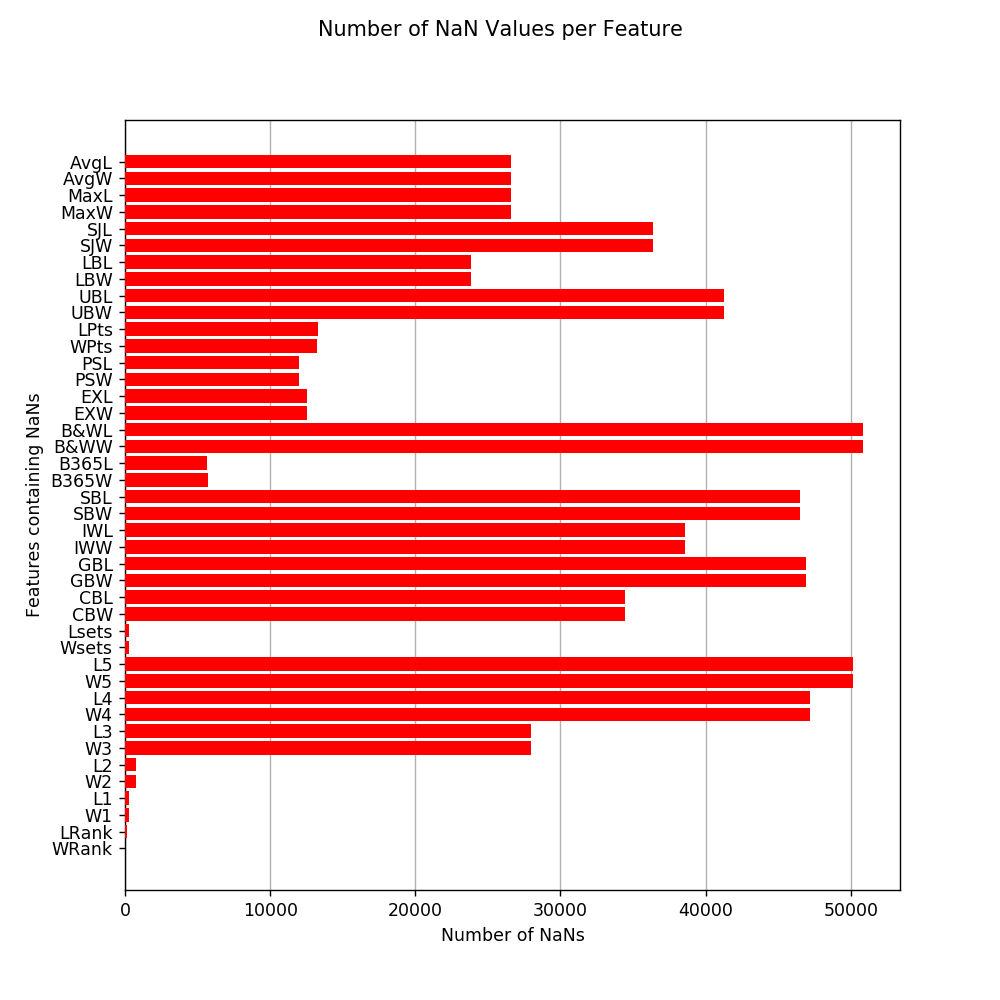

In [199]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Let's check how many missing values does each attribute have
def printNan():
    dictionary = {}
    for c in dataframe.columns:
        nan_sum = sum(dataframe[c].isna())
        if (nan_sum!=0): dictionary[c] = nan_sum
    shape = dataframe.shape[0]
    if len(dictionary) > 25:
        fig, ax = plt.subplots(figsize = (8,8))
    else:
        fig, ax = plt.subplots()
    ax.barh(np.arange(len(dictionary)), [v for k,v in dictionary.items()], zorder = 3, color = 'red')
    ax.set_yticks(np.arange(len(dictionary)))
    ax.set_yticklabels([k for k,v in dictionary.items()])
    fig.suptitle('Number of NaN Values per Feature')
    ax.set(xlabel = 'Number of NaNs', ylabel = 'Features containing NaNs')
    ax.xaxis.grid(zorder = 0)
    
    fig.show()
    
    #for key, value in dictionary.items():
    #    print(key, ': ', value, '/', shape)
        
def printRowsWithoutRanking():
    noBets = 0
    odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW', 'AvgW']
    odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL', 'AvgL']
    for i,r in dataframe.iterrows():
        if r[odds_W].isna().all() or r[odds_L].isna().all(): noBets += 1
    print('Rows without winner or loser bettings:', noBets)
    
printNan()

#printRowsWithoutRanking()

Come prima cosa procedo a correggere le feature riguardanti le scommesse dei bookmaker.

Rimuovo le righe che non hanno alcuna scommessa da parte dei bookmaker e sono prive delle feature che indicano la media delle scommesse per il vincitore e per il perdente (***AvgW*** e ***AvgL***).

Poi procedo riempiendo le feature ***AvgW*** e ***AvgL*** che presentano valori *NaN* rispettivamente con la media delle scommesse dei bookmaker per il vincitore e per il perdente.

Procedo riempiendo le feature ***MaxW*** e ***MaxL*** che presentano valori *NaN* rispettivamente con il massimo tra le scommesse dei bookmaker per il vincitore e per il perdente (considero pure ***AvgW*** e ***AvgL***).

Creo due nuove feature ***MinW*** e ***MinL*** che presentano rispettivamente il minimo valore tra le scommesse dei bookmaker per il vincitore e per il perdente (considero pure ***AvgW*** e ***AvgL***).

Infine elimino tutte le colonne del dataset riguardanti le scommesse dei singoli bookmaker.

In [200]:
odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW']
odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL']

print('Procedo eliminando le righe senza alcuna scommessa dei bookmaker:')

print('Righe prima dell\'eliminazione: ', dataframe.shape[0])
dataframe.dropna(subset = odds_W + ['AvgW'], axis=0, inplace= True, how = 'all')
dataframe.dropna(subset = odds_L + ['AvgL'], axis=0, inplace= True, how = 'all')
print('Righe dopo l\'eliminazione: ', dataframe.shape[0], '\n')

print('Procedo al filling di AvgW e AvgL:')
print('AvgW settati a NaN prima: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN prima: ',sum(dataframe['AvgL'].isna()))
dataframe['AvgW'].fillna(dataframe[odds_W].mean(axis=1), inplace = True)
dataframe['AvgL'].fillna(dataframe[odds_L].mean(axis=1), inplace= True)
print('AvgW settati a NaN dopo: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN dopo: ',sum(dataframe['AvgL'].isna()), '\n')

print('Procedo al filling di MaxW e MaxL:')
print('MaxW settati a NaN prima: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN prima: ',sum(dataframe['MaxL'].isna()))
dataframe['MaxW'].fillna(dataframe[odds_W + ['AvgW']].max(axis=1), inplace = True)
dataframe['MaxL'].fillna(dataframe[odds_L + ['AvgL']].max(axis=1), inplace= True)
print('MaxW settati a NaN dopo: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN dopo: ',sum(dataframe['MaxL'].isna()), '\n')

print('Creo le colonne MinW e MinL e droppo le scommesse singole dei bookmaker:')
dataframe['MinW'] = dataframe[odds_W + ['AvgW']].min(axis=1)
dataframe['MinL'] = dataframe[odds_L + ['AvgL']].min(axis=1)
dataframe.drop(odds_W + odds_L, axis = 1, inplace= True)

print(dataframe.columns)

dataframe = dataframe.reset_index(drop = True)

Procedo eliminando le righe senza alcuna scommessa dei bookmaker:
Righe prima dell'eliminazione:  51945
Righe dopo l'eliminazione:  51016 

Procedo al filling di AvgW e AvgL:
AvgW settati a NaN prima:  25662
AvgL settati a NaN prima:  25662
AvgW settati a NaN dopo:  0
AvgL settati a NaN dopo:  0 

Procedo al filling di MaxW e MaxL:
MaxW settati a NaN prima:  25662
MaxL settati a NaN prima:  25662
MaxW settati a NaN dopo:  0
MaxL settati a NaN dopo:  0 

Creo le colonne MinW e MinL e droppo le scommesse singole dei bookmaker:
Index(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court',
       'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'WPts', 'LPts', 'MaxW', 'MaxL', 'AvgW', 'AvgL',
       'MinW', 'MinL'],
      dtype='object')


<IPython.core.display.Javascript object>


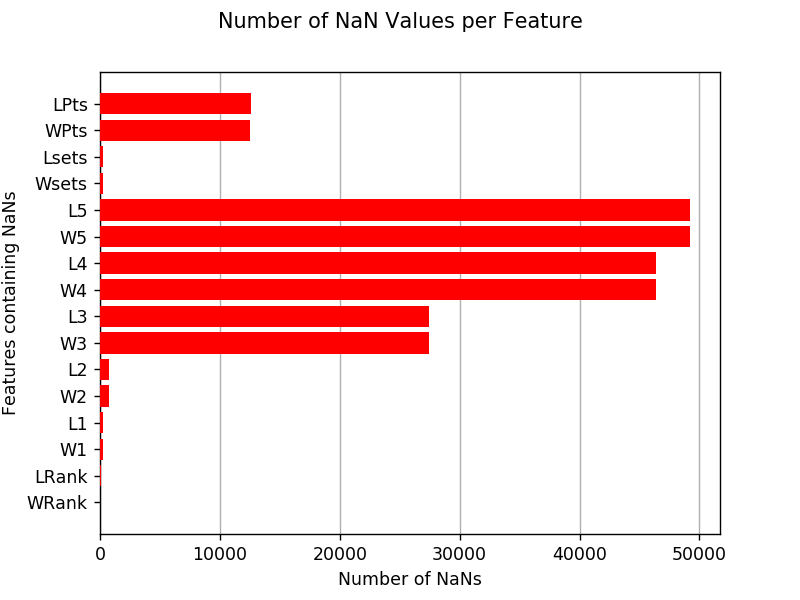

In [201]:
printNan()

Procedo a correggere le feature riguardanti il Rank dei giocatori (***WRank*** e ***LRank***).

Assegno ai valori del Ranking settati a *NaN* il valore  medio dei ranking (***WRank*** e ***LRank***) di quel giocatore, se questo valore non esiste elimino la riga.

Aggiungo le colonne ***WRankAdded*** e ***LRankAdded*** che assumono valori binari:
* 0 se il Rank era già presente;
* 1 se è stato inferito manualmente.

In [202]:
def getMeanFeatureOfPlayer(player, value):
    rankList = dataframe[dataframe['Winner'] == player]['W'+value].append(
        dataframe[dataframe['Loser'] == player]['L'+value])
    return rankList.mean(skipna = True)

def getPlayersMeanFeature (value):
    players = dataframe['Winner'].append(dataframe['Loser']).unique()
    return {x : getMeanFeatureOfPlayer(x,value) for x in players}
    
def assignFeatureToPlayers(value):
    playersMeanRank = getPlayersMeanFeature (value)
    meanW = dataframe[dataframe['W'+value].isna()]['Winner'].apply(lambda x: playersMeanRank[x])
    meanL = dataframe[dataframe['L'+value].isna()]['Loser'].apply(lambda x: playersMeanRank[x])
    dataframe['W'+value].fillna(meanW, inplace = True)
    dataframe['L'+value].fillna(meanL, inplace = True)

In [203]:
dataframe.insert(dataframe.columns.get_loc('WRank') + 1, column = 'WRankAdded', value = 0)
dataframe.loc[dataframe['WRank'].isna(), 'WRankAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LRank') + 1, column = 'LRankAdded', value = 0)
dataframe.loc[dataframe['LRank'].isna(), 'LRankAdded'] = 1

print('Filling di WRank e LRank:')
print('WRank settati a NaN prima: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN prima: ',sum(dataframe['LRank'].isna()))

assignFeatureToPlayers('Rank')

print('WRank settati a NaN dopo: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN dopo: ',sum(dataframe['LRank'].isna()), '\n')

print('Dropping di righe  con WRank e LRank ancora settate a NaN:')
print('Righe prima dell\'eliminazione: ', dataframe.shape[0])

dataframe.dropna(subset = ['WRank'], axis=0, inplace= True)
dataframe.dropna(subset = ['LRank'], axis=0, inplace= True)

print('Righe dopo l\'eliminazione: ', dataframe.shape[0])

dataframe = dataframe.reset_index(drop = True)

Filling di WRank e LRank:
WRank settati a NaN prima:  18
LRank settati a NaN prima:  99
WRank settati a NaN dopo:  1
LRank settati a NaN dopo:  33 

Dropping di righe  con WRank e LRank ancora settate a NaN:
Righe prima dell'eliminazione:  51016
Righe dopo l'eliminazione:  50982


<IPython.core.display.Javascript object>


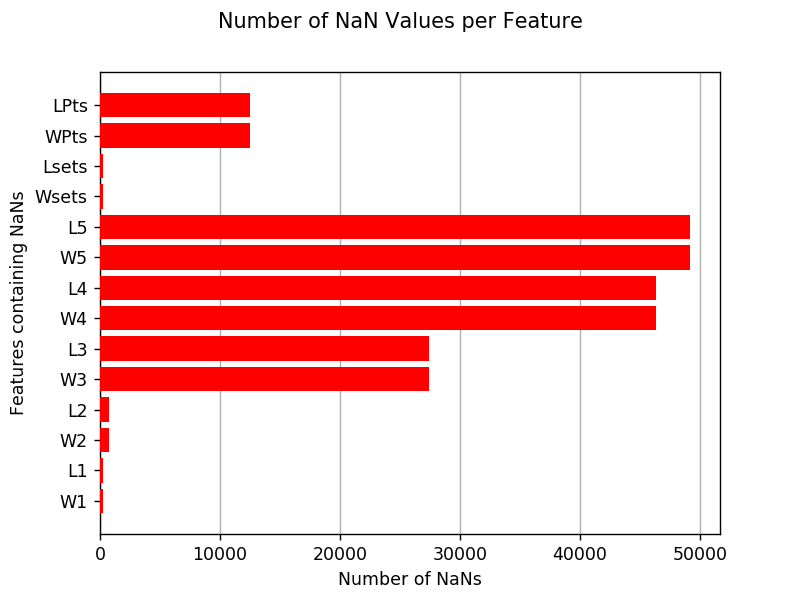

In [204]:
printNan()

Procedo a correggere le feature riguardanti i Punti dei giocatori (***WPts*** e ***LPts***).

Dato che i Punti determinano il Rank dei giocatori, controllo la relazione tra essi e ***WRank*** e ***LRank***

<IPython.core.display.Javascript object>


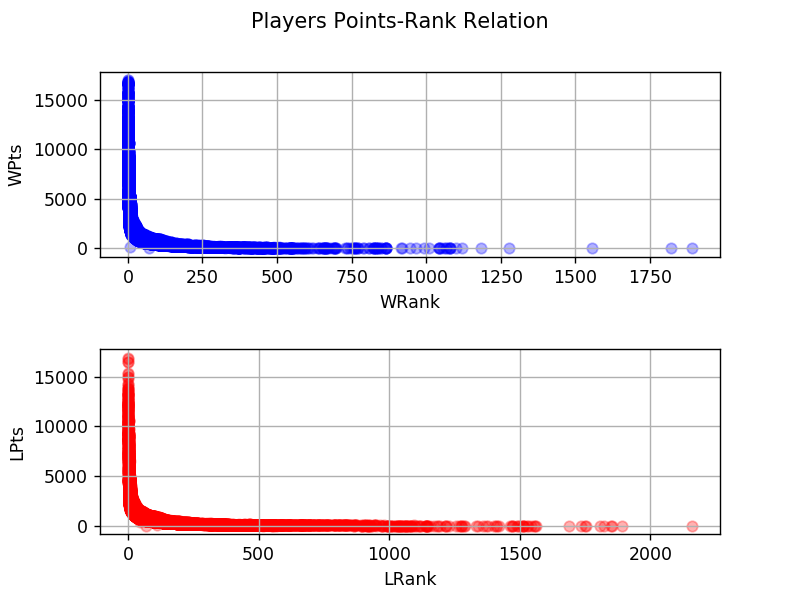

In [205]:
%matplotlib notebook

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
fig.suptitle('Players Points-Rank Relation')
ax[0].scatter(dataframe['WRank'], dataframe['WPts'], color = 'blue', alpha=0.3)
ax[1].scatter(dataframe['LRank'], dataframe['LPts'], color = 'red', alpha=0.3)
ax[0].set(xlabel = 'WRank', ylabel = 'WPts')
ax[1].set(xlabel = 'LRank', ylabel = 'LPts')
ax[0].grid()
ax[1].grid()
fig.subplots_adjust(hspace = 0.5)
fig.show()

Sembra che ***LRank*** e ***WRank*** siano quadraticamente correlati a ***LPts*** e ***WPts***.

Procedo ad utilizzare un Albero di Regressione che dovrebbe adattarsi meglio a dati non correlati linearmente.
Per determinare l'accuratezza della predizione controllo la *Radice dello Scarto Quadratico Medio (RMSE)* del dataset suddiviso in Train Validation e Test.

<IPython.core.display.Javascript object>


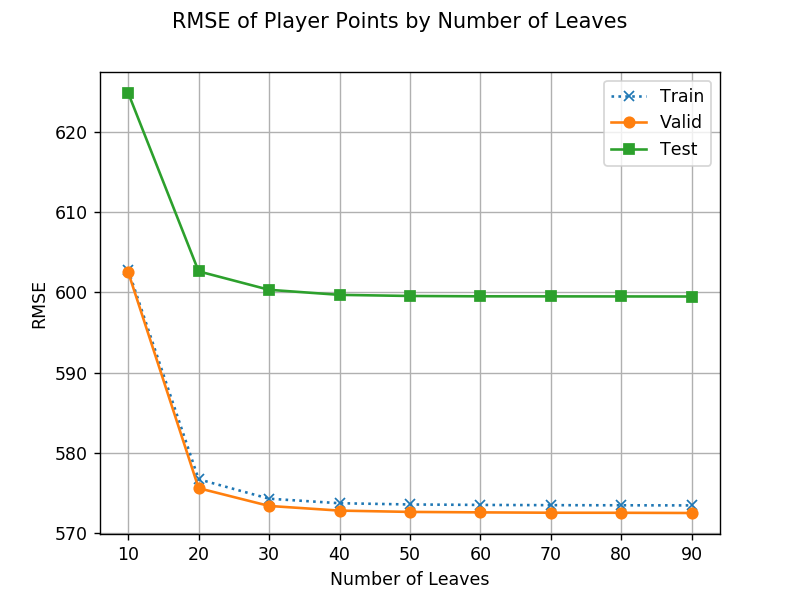

In [206]:
%matplotlib notebook

import matplotlib.pyplot as plt
import math, statistics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                              l_min=10, l_max=100, l_step=10):

    errors = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_err =  math.sqrt(mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train)))
        valid_err =  math.sqrt(mean_squared_error(y_true=y_valid, y_pred=dt.predict(X_valid)))
        test_err  =  math.sqrt(mean_squared_error(y_true=y_test, y_pred=dt.predict(X_test)))

        errors += [ [max_leaves, train_err, valid_err, test_err] ]

    errors = np.array(errors)
    
    return errors

X = dataframe[dataframe['WPts'].notna()]['WRank'].append(dataframe[dataframe['LPts'].notna()]['LRank'])
y = dataframe[dataframe['WPts'].notna()]['WPts'].append(dataframe[dataframe['LPts'].notna()]['LPts'])

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

X_train_0, X_test, y_train_0, y_test = train_test_split( X, y, 
                                                         test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_0, y_train_0, 
                                                         test_size=0.25)


errors = accuracies_vary_max_leaves(X_train, X_valid, X_test, 
                           y_train, y_valid, y_test)

fig, ax = plt.subplots()
fig.suptitle('RMSE of Player Points by Number of Leaves')
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Valid")
ax.plot(errors[:,0], errors[:,3], "s-", label="Test")
ax.set_ylabel("RMSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend()
fig.show()

La *Radice dello Scarto Quadratico Medio* risulta essere troppo alta, quindi i Punti dei giocatori non sono direttamente inferibili dal Rank dei giocatori.

Procedo a correggere le feature mancanti riguardanti i Punti dei giocatori (***WPts*** e ***LPts***) in modo analogo a quanto ho fatto per ***WRank*** e ***LRank***.

Aggiungo anche in questo caso le colonne ***WPtsAdded*** e ***LPtsAdded*** che assumono valori binari:

* 0 se i Punti erano già presenti;
* 1 se sono stati inferiti manualmente.


In [207]:
dataframe.insert(dataframe.columns.get_loc('WPts') + 1, column = 'WPtsAdded', value = 0)
dataframe.loc[dataframe['WPts'].isna(), 'WPtsAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LPts') + 1, column = 'LPtsAdded', value = 0)
dataframe.loc[dataframe['LPts'].isna(), 'LPtsAdded'] = 1

print('Filling di WPts e LPts:')
print('WPts settati a NaN prima: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN prima: ',sum(dataframe['LPts'].isna()))
            
assignFeatureToPlayers('Pts')

print('WPts settati a NaN dopo: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN dopo: ',sum(dataframe['LPts'].isna()), '\n')

print('Dropping di righe  con WRank e LRank ancora settate a NaN:')
print('Righe prima dell\'eliminazione: ', dataframe.shape[0])

dataframe.dropna(subset = ['WPts'], axis=0, inplace= True)
dataframe.dropna(subset = ['LPts'], axis=0, inplace= True)

print('Righe dopo l\'eliminazione: ', dataframe.shape[0])

dataframe = dataframe.reset_index(drop = True)

Filling di WPts e LPts:
WPts settati a NaN prima:  12474
LPts settati a NaN prima:  12520
WPts settati a NaN dopo:  1645
LPts settati a NaN dopo:  2313 

Dropping di righe  con WRank e LRank ancora settate a NaN:
Righe prima dell'eliminazione:  50982
Righe dopo l'eliminazione:  47475


<IPython.core.display.Javascript object>


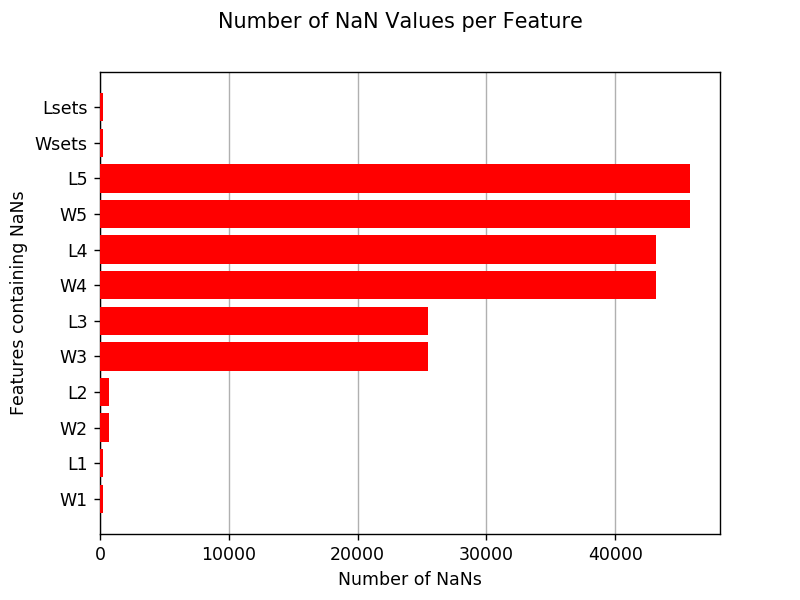

In [208]:
printNan()

Per quanto riguarda i valori *NaN* delle feature riguardanti i Set vinti dal vincitore e dal perdente (***Wsets*** e ***Lsets***) e i valori delle feature riguardanti i Punti per ogni Set dei due giocatori (***W1***, ***W2***, ***W3***, ***W4***, ***W5*** e ***L1***, ***L2***, ***L3***, ***L4***, ***L5***):
* Controllo solo i valori *NaN* di ***Wsets***, ***Lsets***, ***W1***, ***L1***, ***W2***, ***L2*** per tutte le partite e di ***W3***, ***L3*** solo per le partite al meglio di 5 (***Best Of*** = 5);
* Controllo solo le partite portate a termine (***Comment*** = *'Completed'*);
* Elimino le righe corrispondenti a questi match;
* Setto tutti i valori *NaN* rimanenti delle feature a 0.

In [209]:
def dropCompletedNan (feature):
    if feature == 'sets':
        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL o 0.\n')
        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['W'+feature] == 0]).drop_duplicates()
        noDf = noDf.append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()
    else:
        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL.\n')
        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()
        
    if feature == '3':
        print ('Consideriamo solo le partite al meglio di 5.\n')
        noDf = noDf[noDf['Best of'] == 5]
    
    print(noDf['Comment'].unique())
        
    if noDf[noDf['Comment'] == 'Completed'].shape[0] > 0:
        print ('\nControlliamo solo i casi in cui la partita è stata completata.\n')

        print(noDf[noDf['Comment'] == 'Completed'][['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5',
                                                    'Wsets','Lsets', 'Best of']])

        print('\nScarto le righe incomplete.\n')

        print('Righe prima della modifica: ', dataframe.shape[0])

        dataframe.drop(noDf[noDf['Comment'] == 'Completed'].index.values, axis = 0, inplace = True)

        print('Righe dopo la modifica: ', dataframe.shape[0])
    else:
        print ('\nEsistono solo i casi in cui la partita non è stata completata, non scartiamo nessuna riga.\n')
        
    print('\n\n')

In [210]:
dropCompletedNan('sets')
dropCompletedNan('1')
dropCompletedNan('2')
dropCompletedNan('3')
dataframe.reset_index(drop = True, inplace = True)


Commenti delle partite in cui Wsets  e Lsets  è NULL o 0.

['Walkover' 'Retired' 'Completed' 'Disqualified']

Controlliamo solo i casi in cui la partita è stata completata.

        W1   W2  W3  W4  W5   L1   L2  L3  L4  L5  Wsets  Lsets  Best of
11890  NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN    NaN    NaN      5.0
30841  6.0  7.0 NaN NaN NaN  3.0  6.0 NaN NaN NaN    0.0    0.0      3.0
35873  1.0  NaN NaN NaN NaN  2.0  NaN NaN NaN NaN    0.0    0.0      3.0
47072  6.0  3.0 NaN NaN NaN  7.0  4.0 NaN NaN NaN    0.0    1.0      3.0

Scarto le righe incomplete.

Righe prima della modifica:  47475
Righe dopo la modifica:  47471




Commenti delle partite in cui W1  e L1  è NULL.

['Walkover' 'Completed' 'Retired']

Controlliamo solo i casi in cui la partita è stata completata.

       W1  W2  W3  W4  W5  L1  L2  L3  L4  L5  Wsets  Lsets  Best of
20164 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN    2.0    0.0      3.0

Scarto le righe incomplete.

Righe prima della modifica:  47471
Righe do

<IPython.core.display.Javascript object>


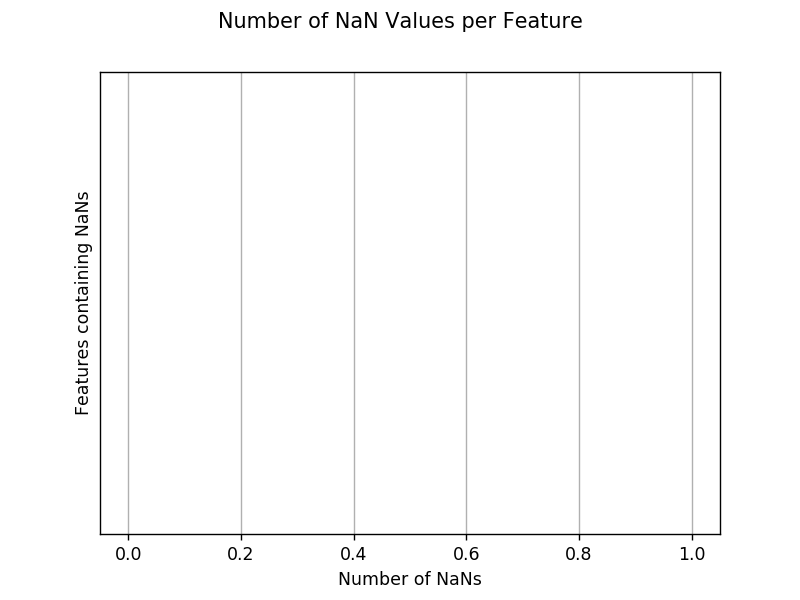

In [211]:
dataframe.loc[:,'W1':'Lsets'] = dataframe.loc[:,'W1':'Lsets'].fillna(0)

printNan()

### Trasformazione Variabili Categoriali
Controllo solo le feature categoriali (Tipo = *Object*) e procedo alla loro trasformazione in variabili numeriche.

In [212]:
print ("Variabili Categoriali:")
print(dataframe.dtypes[dataframe.dtypes == object].index.values)

for value in dataframe.dtypes[dataframe.dtypes == object].index.values:
    print('\n', value, 'values length: ', len(dataframe[value].unique()))
    print('\t', dataframe[value].unique()[:20])

Variabili Categoriali:
['Location' 'Tournament' 'Series' 'Court' 'Surface' 'Round' 'Winner'
 'Loser' 'Comment']

 Location values length:  111
	 ['Adelaide' 'Chennai' 'Doha' 'Auckland' 'Sydney' 'Melbourne' 'Milan'
 'Copenhagen' 'Marseille' 'Vina del Mar' 'Buenos Aires' 'Memphis'
 'Rotterdam' 'Acapulco' 'Dubai' 'San Jose' 'Delray Beach' 'Scottsdale'
 'Indian Wells' 'Miami']

 Tournament values length:  208
	 ['AAPT Championships' 'TATA Open' 'Qatar Open' 'Heineken Open'
 'adidas International' 'Australian Open' 'Milan Indoors'
 'Copenhagen Open' 'Marseille Open' 'Bellsouth Open' 'Copa AT&T'
 'Kroger St. Jude' 'ABN AMRO World Tennis Tournament' 'Abierto Mexicano'
 'Dubai Championships' 'Sybase Open' 'Citrix Tennis Championships'
 'Franklin Templeton Tennis Classic' 'Indian Wells TMS' 'Ericsson Open']

 Series values length:  8
	 ['International' 'Grand Slam' 'International Gold' 'Masters' 'Masters Cup'
 'ATP250' 'ATP500' 'Masters 1000']

 Court values length:  2
	 ['Outdoor' 'Indoor']

 

Uso la tecnica dello ***one-hot-encoding*** per trasformare le feature con un numero limitato di label e che non presentano nessun tipo di struttura gerarchica (***Court***, ***Surface***, ***Comment***).

In [213]:
dataframe = pandas.get_dummies(dataframe, prefix = ['', '', ''],
                   prefix_sep = '', columns = ['Court', 'Surface', 'Comment'])

dataframe.columns

Index(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series', 'Round',
       'Best of', 'Winner', 'Loser', 'WRank', 'WRankAdded', 'LRank',
       'LRankAdded', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5',
       'L5', 'Wsets', 'Lsets', 'WPts', 'WPtsAdded', 'LPts', 'LPtsAdded',
       'MaxW', 'MaxL', 'AvgW', 'AvgL', 'MinW', 'MinL', 'Indoor', 'Outdoor',
       'Carpet', 'Clay', 'Grass', 'Hard', 'Awarded', 'Completed',
       'Disqualified', 'Retired', 'Sched', 'Walkover'],
      dtype='object')

Per quanto riguarda i ***Round***:
* Posso assegnare alle feature un valore numerico crescente in base all'importanza del Round:
    * *1st Round* < *2nd Round* < *3rd Round* < *4th Round* < *Quarterfinals* < *Semifinals* < *The Final*;
* *Round Robin* non è paragonabile agli altri tipi di round, quindi aggiungo una colonna con valore:
    * 0 se il Round non è *Round Robin*;
    * 1 se lo è.

In [214]:
print('Tipi di Round:')

print(dataframe['Round'].unique())

dataframe.insert(dataframe.columns.get_loc('Round') + 1, column = 'RoundRobin', value = 0)
dataframe.loc[dataframe['Round'] == 'Round Robin', 'RoundRobin'] = 1

roundsOrdered = {'1st Round': 1, '2nd Round': 2, 'Quarterfinals': 5, 'The Final': 7, 'Semifinals': 6,
 '3rd Round': 3, '4th Round': 4, 'Round Robin': 0}

dataframe['Round'] = dataframe['Round'].apply(lambda x : roundsOrdered[x])

Tipi di Round:
['1st Round' '2nd Round' 'Quarterfinals' 'The Final' 'Semifinals'
 '3rd Round' '4th Round' 'Round Robin']


Per quanto riguarda la colonna ***Series***:

* Posso assegnare alle feature un valore numerico crescente in base all'importanza del tipo di torneo;
* Alcuni tornei hanno cambiato nome nel tempo e risulta:
    * *ATP 250* = *International* < *ATP 500* = *International Gold* < *Masters* = *Masters 1000* < *Masters Cup* < *Grand Slam*

In [215]:
print('Tipi di Tornei:')

print(dataframe['Series'].unique())

pandas.DataFrame(columns = ['Series','WPts'], data = [
    ['Grand Slam', 2000],
    ['Masters Cup/ATP Finals', 1500],
    ['ATP250/International', 250],
    ['ATP500/International Gold', 500],
    ['Masters/Masters 1000', 1000],
])

Tipi di Tornei:
['International' 'Grand Slam' 'International Gold' 'Masters' 'Masters Cup'
 'ATP250' 'ATP500' 'Masters 1000']


,Series,WPts
0,Grand Slam,2000
1,Masters Cup/ATP Finals,1500
2,ATP250/International,250
3,ATP500/International Gold,500
4,Masters/Masters 1000,1000


In [216]:
seriesOrdered = {'ATP250': 1, 'International': 1, 'ATP500': 2,'International Gold': 2, 'Masters' : 3, 'Masters 1000': 3,
                'Masters Cup': 4, 'Grand Slam': 5}
dataframe['Series'] = dataframe['Series'].apply(lambda x : seriesOrdered[x])

Le feature ***Tournament*** e ***Location*** presentano troppi label distinti.
Per non allargare troppo il Dataframe con lo ***one-hot-encoding*** uso il ***Label Encoder*** per trasformare ogni stringa in un valore intero.

In [217]:
from sklearn.preprocessing import LabelEncoder

leTournament = LabelEncoder().fit(dataframe['Tournament'])
leLocation = LabelEncoder().fit(dataframe['Location'])

dataframe['Tournament'] = leTournament.transform(dataframe['Tournament'])
dataframe['Location'] = leLocation.transform(dataframe['Location'])

Trasformo infine la colonna ***Date*** suddividendola nelle colonne ***Day***, ***Month*** e ***Year***. 

In [218]:
dataframe['Day'] = dataframe['Date'].dt.day 
dataframe['Month'] = dataframe['Date'].dt.month 
dataframe['Year'] = dataframe['Date'].dt.year

dataframe.drop('Date', axis = 1, inplace= True)

Trasformo le feature ***Winner*** e ***Loser*** in numeriche intere:
* Ordino i giocatori in base alla differenza tra il numero delle loro vittorie e quello delle loro sconfitte;
* Assegno un numero crescente ai giocatori in base a quest'ordine.

In [219]:
players = dataframe['Winner'].value_counts().subtract(dataframe['Loser'].value_counts(), fill_value = 0).sort_values(ascending = True)

valueFromPlayer = {w:i for i,w in enumerate(players.index)}
playerFromValue = {i:w for i,w in enumerate(players.index)}

dataframe['Winner'] = dataframe['Winner'].apply(lambda x : valueFromPlayer[x])
dataframe['Loser'] = dataframe['Loser'].apply(lambda x : valueFromPlayer[x])

In [220]:
dataframe.head()

,csvID,ATP,Location,Tournament,Series,Round,RoundRobin,Best of,Winner,Loser,...,Hard,Awarded,Completed,Disqualified,Retired,Sched,Walkover,Day,Month,Year
0,0,1.0,2,0,1,1,0,3.0,1120,110,...,1,0,1,0,0,0,0,1,1,2001
1,0,1.0,2,0,1,2,0,3.0,1109,460,...,1,0,1,0,0,0,0,1,1,2001
2,0,1.0,2,0,1,2,0,3.0,1120,13,...,1,0,1,0,0,0,0,1,1,2001
3,0,1.0,2,0,1,2,0,3.0,959,174,...,1,0,1,0,0,0,0,1,1,2001
4,0,1.0,2,0,1,5,0,3.0,1109,1120,...,1,0,1,0,0,0,0,1,1,2001


Modifico il dataframe in modo da poter ottenere un modello adatto alla predizione:
* Rinomino ***Winner*** in ***PlayerA*** e ***Loser*** in ***PlayerB***;
* Rinomino tutte le colonne con informazioni legate al vincitore e al perdente in modo da riflettere il legame ai nuovi nomi assegnati;
* Creo la colonna ***Winner*** che assume i valori:
    * 0 se ha vinto ***PlayerA***;
    * 1 se ha vinto ***PlayerB***;
* Assegno a ***Winner*** tutti valori 0;
* Duplico il dataframe e faccio lo swapping tra tutte le colonne con informazioni sul Giocatore A e quelle con informazioni sul Giocatore B;
* Assegno il valore 1 a ogni entry della colonna ***Winner*** del nuovo dataframe;
* Unisco i due dataframe.

In [221]:
dataframe.columns

dataframe.rename(columns={'Winner':'PlayerA', 
                          'Loser':'PlayerB',
                          'WRank':'ARank',
                          'WRankAdded':'ARankFilled',
                          'LRank':'BRank',
                          'LRankAdded':'BRankFilled',
                          'W1':'A1',
                          'L1':'B1',
                          'W2':'A2',
                          'L2':'B2',
                          'W3':'A3',
                          'L3':'B3',
                          'W4':'A4',
                          'L4':'B4',
                          'W5':'A5',
                          'L5':'B5',
                          'Wsets':'Asets',
                          'Lsets':'Bsets',
                          'WPts':'APts',
                          'LPts':'BPts',
                          'WPtsAdded':'APtsFilled',
                          'LPtsAdded':'BPtsFilled',
                          'MaxW':'MaxA',
                          'MaxL':'MaxB',
                          'AvgW':'AvgA',
                          'AvgL':'AvgB',
                          'MinW':'MinA',
                          'MinL':'MinB',
                         }, inplace = True)

dataframe.insert(0, column ='Winner', value = 0)

In [222]:
dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Round,RoundRobin,Best of,PlayerA,...,Hard,Awarded,Completed,Disqualified,Retired,Sched,Walkover,Day,Month,Year
0,0,0,1.0,2,0,1,1,0,3.0,1120,...,1,0,1,0,0,0,0,1,1,2001
1,0,0,1.0,2,0,1,2,0,3.0,1109,...,1,0,1,0,0,0,0,1,1,2001
2,0,0,1.0,2,0,1,2,0,3.0,1120,...,1,0,1,0,0,0,0,1,1,2001
3,0,0,1.0,2,0,1,2,0,3.0,959,...,1,0,1,0,0,0,0,1,1,2001
4,0,0,1.0,2,0,1,5,0,3.0,1109,...,1,0,1,0,0,0,0,1,1,2001


In [223]:
dataframeInverted = dataframe.copy(deep = True)

dataframeInverted['Winner'] = 1
dataframeInverted[['PlayerA', 'PlayerB']] = dataframeInverted[['PlayerB', 'PlayerA']]
dataframeInverted[['ARank', 'BRank']] = dataframeInverted[['BRank', 'ARank']]
dataframeInverted[['ARankFilled', 'BRankFilled']] = dataframeInverted[['BRankFilled', 'ARankFilled']]
dataframeInverted[['A1', 'B1']] = dataframeInverted[['B1', 'A1']]
dataframeInverted[['A2', 'B2']] = dataframeInverted[['B2', 'A2']]
dataframeInverted[['A3', 'B3']] = dataframeInverted[['B3', 'A3']]
dataframeInverted[['A4', 'B4']] = dataframeInverted[['B4', 'A4']]
dataframeInverted[['A5', 'B5']] = dataframeInverted[['B5', 'A5']]
dataframeInverted[['Asets', 'Bsets']] = dataframeInverted[['Bsets', 'Asets']]
dataframeInverted[['APts', 'BPts']] = dataframeInverted[['BPts', 'APts']]
dataframeInverted[['APtsFilled', 'BPtsFilled']] = dataframeInverted[['BPtsFilled', 'APtsFilled']]
dataframeInverted[['MaxA', 'MaxB']] = dataframeInverted[['MaxB', 'MaxA']]
dataframeInverted[['AvgA', 'AvgB']] = dataframeInverted[['AvgB', 'AvgA']]
dataframeInverted[['MinA', 'MinB']] = dataframeInverted[['MinB', 'MinA']]

In [224]:
dataframeInverted.head()

,Winner,csvID,ATP,Location,Tournament,Series,Round,RoundRobin,Best of,PlayerA,...,Hard,Awarded,Completed,Disqualified,Retired,Sched,Walkover,Day,Month,Year
0,1,0,1.0,2,0,1,1,0,3.0,110,...,1,0,1,0,0,0,0,1,1,2001
1,1,0,1.0,2,0,1,2,0,3.0,460,...,1,0,1,0,0,0,0,1,1,2001
2,1,0,1.0,2,0,1,2,0,3.0,13,...,1,0,1,0,0,0,0,1,1,2001
3,1,0,1.0,2,0,1,2,0,3.0,174,...,1,0,1,0,0,0,0,1,1,2001
4,1,0,1.0,2,0,1,5,0,3.0,1120,...,1,0,1,0,0,0,0,1,1,2001


In [225]:
from sklearn.utils import shuffle

dataframe = dataframe.append(dataframeInverted, sort = False, ignore_index = True)
dataframe = shuffle(dataframe)

In [226]:
dataframe.head(10)

,Winner,csvID,ATP,Location,Tournament,Series,Round,RoundRobin,Best of,PlayerA,...,Hard,Awarded,Completed,Disqualified,Retired,Sched,Walkover,Day,Month,Year
31813,0,13,3.0,28,149,1,1,0,3.0,236,...,1,0,1,0,0,0,0,31,12,2013
60971,1,6,13.0,19,46,1,0,1,3.0,45,...,0,0,1,0,0,0,0,19,2,2007
16272,0,7,13.0,85,165,1,1,0,3.0,138,...,1,0,1,0,0,0,0,19,2,2008
85097,1,15,19.0,42,24,3,2,0,3.0,1086,...,1,0,0,0,0,0,1,13,3,2016
71424,1,10,4.0,8,84,1,2,0,3.0,60,...,1,0,1,0,0,0,0,12,1,2011
32988,0,13,32.0,76,68,5,1,0,5.0,164,...,0,0,1,0,0,0,0,26,5,2014
37359,0,15,11.0,59,113,1,1,0,3.0,636,...,1,0,1,0,0,0,0,9,2,2016
84787,1,15,10.0,19,15,1,1,0,3.0,227,...,0,0,1,0,0,0,0,8,2,2016
26587,0,11,3.0,28,149,1,1,0,3.0,1121,...,1,0,1,0,0,0,0,3,1,2012
35997,0,14,40.0,71,80,1,1,0,3.0,233,...,0,0,1,0,0,0,0,13,7,2015


In [227]:
australianValue = leTournament.transform(['Australian Open'])[0]
ausDataframe = dataframe[dataframe['Tournament'] == australianValue]
ausDataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Round,RoundRobin,Best of,PlayerA,...,Hard,Awarded,Completed,Disqualified,Retired,Sched,Walkover,Day,Month,Year
16062,0,7,6.0,58,17,5,3,0,5.0,1118,...,1,0,1,0,0,0,0,19,1,2008
66144,1,8,6.0,58,17,5,1,0,5.0,9,...,1,0,1,0,0,0,0,20,1,2009
42417,0,17,6.0,58,17,5,1,0,5.0,1079,...,1,0,1,0,0,0,0,16,1,2018
26776,0,11,6.0,58,17,5,4,0,5.0,1128,...,1,0,1,0,0,0,0,22,1,2012
89949,1,17,6.0,58,17,5,5,0,5.0,1123,...,1,0,1,0,0,0,0,24,1,2018


In [228]:
nonAusDataframe = dataframe[dataframe['Tournament'] != australianValue]
nonAusDataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Round,RoundRobin,Best of,PlayerA,...,Hard,Awarded,Completed,Disqualified,Retired,Sched,Walkover,Day,Month,Year
31813,0,13,3.0,28,149,1,1,0,3.0,236,...,1,0,1,0,0,0,0,31,12,2013
60971,1,6,13.0,19,46,1,0,1,3.0,45,...,0,0,1,0,0,0,0,19,2,2007
16272,0,7,13.0,85,165,1,1,0,3.0,138,...,1,0,1,0,0,0,0,19,2,2008
85097,1,15,19.0,42,24,3,2,0,3.0,1086,...,1,0,0,0,0,0,1,13,3,2016
71424,1,10,4.0,8,84,1,2,0,3.0,60,...,1,0,1,0,0,0,0,12,1,2011


In [229]:
print (nonAusDataframe.shape[0]/dataframe.shape[0], ausDataframe.shape[0]/dataframe.shape[0])



0.9544276594399849 0.04557234056001517


In [230]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# this is a 60/20/20 split
X_train, _, y_train, _ = train_test_split(nonAusDataframe.loc[:, nonAusDataframe.columns != 'Winner'], 
                                                          nonAusDataframe['Winner'], 
                                                          test_size = (nonAusDataframe.shape[0]/dataframe.shape[0] * 60)/100, 
                                                          random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(ausDataframe.loc[:, ausDataframe.columns != 'Winner'], 
                                                          ausDataframe['Winner'], test_size=0.5, random_state=42)

accuracies = []

for max_leaves in range(2,10):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(
        max_leaves,  train_acc, valid_acc, test_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# here we are using both training and validation,
# to exploit the most data
dt = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt.fit(X_train,y_train)

test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print ("Test Accuracy: {:.3f}".format(test_acc) )

Leaves:  2 - Train Accuracy: 0.970 - Validation Accuracy: 0.890 - Test Accuracy: 0.893
Leaves:  3 - Train Accuracy: 0.983 - Validation Accuracy: 0.987 - Test Accuracy: 0.984
Leaves:  4 - Train Accuracy: 0.991 - Validation Accuracy: 0.990 - Test Accuracy: 0.992
Leaves:  5 - Train Accuracy: 0.992 - Validation Accuracy: 0.990 - Test Accuracy: 0.993
Leaves:  6 - Train Accuracy: 0.992 - Validation Accuracy: 0.990 - Test Accuracy: 0.993
Leaves:  7 - Train Accuracy: 0.993 - Validation Accuracy: 0.990 - Test Accuracy: 0.993
Leaves:  8 - Train Accuracy: 0.993 - Validation Accuracy: 0.990 - Test Accuracy: 0.993
Leaves:  9 - Train Accuracy: 0.993 - Validation Accuracy: 0.990 - Test Accuracy: 0.993
Best Max Leaves 9
Test Accuracy: 0.993


In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                          dataframe['Winner'], 
                                                          test_size=0.20, 
                                                          random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)

accuracies = []

for max_leaves in range(2,10):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f}".format(
        max_leaves,  train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# here we are using both training and validation,
# to exploit the most data
dt = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print ("Test Accuracy: {:.3f}".format(test_acc) )

In [231]:
# Vedo similarità tra giocatori che hanno partecipato all' Aus open 2019 rispetto ai giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)
# Riproporre alla fine, quando dataframe è completo e validare il fatto di droppare righe in base ad accuracy

players2019 = set(ausDataframe[ausDataframe['csvID'] == max(ausDataframe['csvID'])]['PlayerA'].append(ausDataframe[ausDataframe['csvID'] == max(ausDataframe['csvID'])]['PlayerB']).unique())
print(type(players2019))
for i in range(0,max(dataframe['csvID'])) :
    players = set(dataframe[dataframe['csvID'] == i]['PlayerA'].append(dataframe[dataframe['csvID'] == i]['PlayerB']).unique())
    print ('Jaccard ', i + 2001, ': ', len(players2019 & players) / len( players2019 | players))
    
# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo
# Prendo

<class 'set'>
Jaccard  2001 :  0.007692307692307693
Jaccard  2002 :  0.017241379310344827
Jaccard  2003 :  0.03235294117647059
Jaccard  2004 :  0.0398936170212766
Jaccard  2005 :  0.043689320388349516
Jaccard  2006 :  0.05689277899343545
Jaccard  2007 :  0.08009708737864078
Jaccard  2008 :  0.0979020979020979
Jaccard  2009 :  0.09684684684684684
Jaccard  2010 :  0.14652956298200515
Jaccard  2011 :  0.1595744680851064
Jaccard  2012 :  0.18082191780821918
Jaccard  2013 :  0.23714285714285716
Jaccard  2014 :  0.2628398791540785
Jaccard  2015 :  0.30063291139240506
Jaccard  2016 :  0.3333333333333333
Jaccard  2017 :  0.36477987421383645
Jaccard  2018 :  0.4232081911262799


In [232]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def getAusDf(df):
    return df[df['Tournament'] == australianValue]

def getNonAusDf(df):
    return df[df['Tournament'] != australianValue]

def getRandomForestPrediction (index, df): 
    print(df.shape)
    print('csvID deleted up to: ', index)
    ausDf = getAusDf(df)
    nonAusDf = getNonAusDf(df)

    X_train, _, y_train, _ = train_test_split(nonAusDf.loc[:, nonAusDf.columns != 'Winner'], 
                                              nonAusDf['Winner'], 
                                              test_size = (nonAusDf.shape[0]/df.shape[0] * 60)/100, 
                                              random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(ausDf.loc[:, ausDf.columns != 'Winner'], 
                                                        ausDf['Winner'], test_size=0.5, random_state=42)
    accuracies_valid = []
    accuracies_test = []
    
    for i in range(2,30,2):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        test_acc = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))
        accuracies_valid += [valid_acc]
        accuracies_test += [test_acc]
    print ("\t Mean Validation Accuracy: {:.3f} - Mean Test Accuracy: {:.3f}".format(
        np.mean(accuracies_valid), np.mean(accuracies_test)) )
    

cutDataframes = [dataframe.drop(dataframe[dataframe['csvID'].isin(range(0, i))].index.values, axis =0) 
                 for i in range(0, max(dataframe['csvID']))]

for i, df in enumerate(cutDataframes):
    getRandomForestPrediction (i, df)

(94926, 52)
csvID deleted up to:  0
	 Mean Validation Accuracy: 0.991 - Mean Test Accuracy: 0.992
(92660, 52)
csvID deleted up to:  1
	 Mean Validation Accuracy: 0.990 - Mean Test Accuracy: 0.991
(89280, 52)
csvID deleted up to:  2
	 Mean Validation Accuracy: 0.993 - Mean Test Accuracy: 0.989
(85162, 52)
csvID deleted up to:  3
	 Mean Validation Accuracy: 0.993 - Mean Test Accuracy: 0.991
(80222, 52)
csvID deleted up to:  4
	 Mean Validation Accuracy: 0.990 - Mean Test Accuracy: 0.990
(74552, 52)
csvID deleted up to:  5
	 Mean Validation Accuracy: 0.990 - Mean Test Accuracy: 0.991
(68836, 52)
csvID deleted up to:  6
	 Mean Validation Accuracy: 0.991 - Mean Test Accuracy: 0.991
(63312, 52)
csvID deleted up to:  7
	 Mean Validation Accuracy: 0.990 - Mean Test Accuracy: 0.989
(57960, 52)
csvID deleted up to:  8
	 Mean Validation Accuracy: 0.989 - Mean Test Accuracy: 0.991
(52548, 52)
csvID deleted up to:  9
	 Mean Validation Accuracy: 0.992 - Mean Test Accuracy: 0.989
(47216, 52)
csvID de

In [ ]:
'''
# Droppo le righe con l'anno fino al 2010 escluso, per lavorare con un dataset più ridotto e sensato

dataframe.drop(dataframe[dataframe['csvID'].isin(range(2001,2010))].index, axis =0, inplace = True)

dataframe = dataframe.reset_index(drop = True)

dataframe.drop(['Year'], axis=1, inplace=True)

dataframe.columns